# Obesity Detection Model

## LifeCycle of the Project:
- Data Collection 
- Data Definition 
- Exploratory Data Analysis(EDA)
- Data Preprocessing
- Model Training 
- Deployment

### Data Defintion (About Data)

In this project, we will be creating a model that will classify whether a person is obese or not. 

This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks.

### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset?
- The Data consist of 16 features and 2111 rows.

## Importing necessary data and libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('A:\End-to-End_project1\obesity_detection\ObesityDataSet_raw_and_data_sinthetic.csv')


<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\mohit\AppData\Local\Temp\ipykernel_14972\2657024043.py:2: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('A:\End-to-End_project1\obesity_detection\ObesityDataSet_raw_and_data_sinthetic.csv')


In [3]:
# Exploratory Data Analysis
df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [4]:
# checking shape of the dataset 

df.shape

(2111, 17)

In [5]:
# printing all the feature names

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Column Descriptions:

- Gender – Male or Female.
- Age – The person’s age in years.
- Weight – Weight in kilograms.
- Height – Height in meters.
- family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
- FAVC – If the person frequently consumes high-calorie foods (yes/no).
- FCVC – Frequency of vegetable consumption (scale from 1 to 3).
- NCP – Number of main meals per day.
- CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
- SMOKE – Whether the person smokes (yes/no).
- CH2O – Daily water intake (scale from 1 to 3).
- SCC – If the person monitors their calorie intake (yes/no).
- FAF – Physical activity frequency (scale from 0 to 3).
- TUE – Time spent using technology (scale from 0 to 3).
- CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
- MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
- NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

This dataset provides a structured view of how different lifestyle factors relate to obesity levels, making it useful for healthcare analysis and decision-making.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# checking the statistics of the dataset

df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75%       2.480000     1.670000     1.000000  
max       3.000000     3.000000     2.000000

In [8]:
## Checking for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There are no missing data in our dataset. Let's check for the duplicates values.

In [9]:
# Checking for duplicates
df.duplicated().sum()

24

In [10]:
# creating a list of all the dublicate rows

l=[]
l = df[df.duplicated()].index.tolist()
print(l)


[98, 106, 174, 179, 184, 209, 309, 460, 467, 496, 527, 659, 663, 763, 764, 824, 830, 831, 832, 833, 834, 921, 922, 923]


In [11]:
# checking all the dublicates values 

print(df.iloc[l]) # printing the duplicate rows

     Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female   21    1.52    42.0                             no   no   3.0   
106  Female   25    1.57    55.0                             no  yes   2.0   
174    Male   21    1.62    70.0                             no  yes   2.0   
179    Male   21    1.62    70.0                             no  yes   2.0   
184    Male   21    1.62    70.0                             no  yes   2.0   
209  Female   22    1.69    65.0                            yes  yes   2.0   
309  Female   16    1.66    58.0                             no   no   2.0   
460  Female   18    1.62    55.0                            yes  yes   2.0   
467    Male   22    1.74    75.0                            yes  yes   3.0   
496    Male   18    1.72    53.0                            yes  yes   2.0   
527  Female   21    1.52    42.0                             no  yes   3.0   
659  Female   21    1.52    42.0                             no 

In [12]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# After removing all the dublicates checking the shape of the dataset

df.shape

(2087, 17)

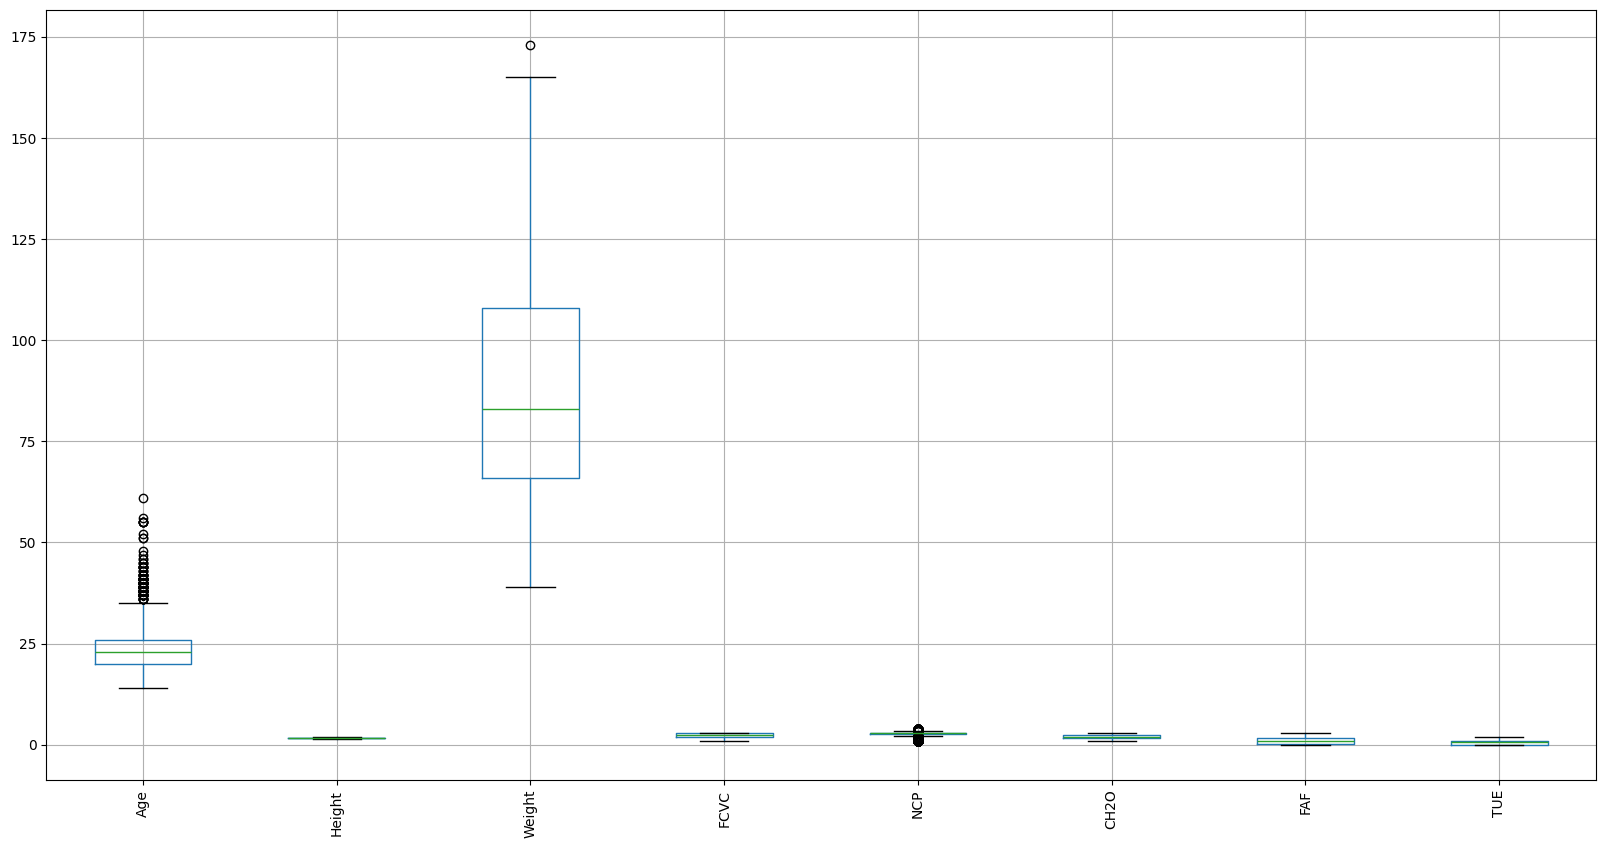

In [14]:
# checking the outliers in the dataset
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

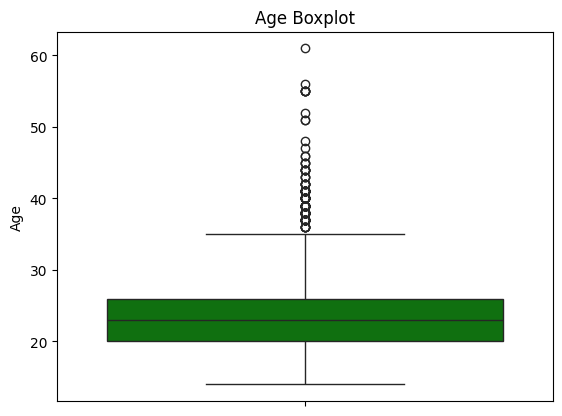

In [15]:
sns.boxplot(df['Age'], color='green')
plt.title('Age Boxplot')
plt.show()

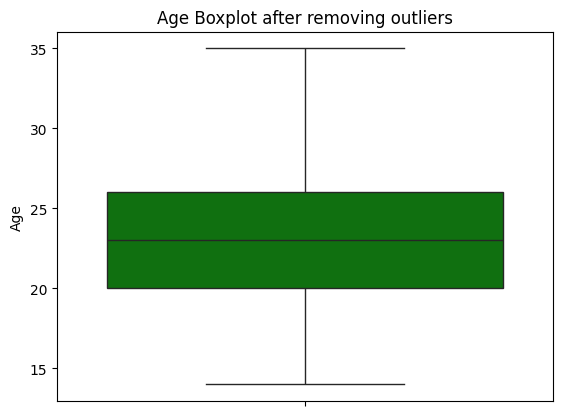

In [16]:
# Handling the outliers in Age 
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
sns.boxplot(df['Age'], color='green')
plt.title('Age Boxplot after removing outliers')
plt.show()



In [17]:
# Reviewing the dataset after removing outliers
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     23.942501     1.702616    86.858706     2.421409     2.701203   
std       5.291643     0.093251    26.190838     0.534807     0.764655   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    66.000000     2.000000     2.700000   
50%      23.000000     1.700000    83.100000     2.400000     3.000000   
75%      26.000000     1.770000   108.015000     3.000000     3.000000   
max      35.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004792     1.012827     0.663031  
std       0.608281     0.853496     0.608152  
min       1.000000     0.000000     0.000000  
25%       1.590000     0.125000     0.000000  
50%       2.000000     1.000000     0.631000  
75%       2.465000     1.680000     1.000000  
max       3.000000     3.000000     2.000000

In [18]:
df.shape

(2087, 17)

In [19]:
# Checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [20]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

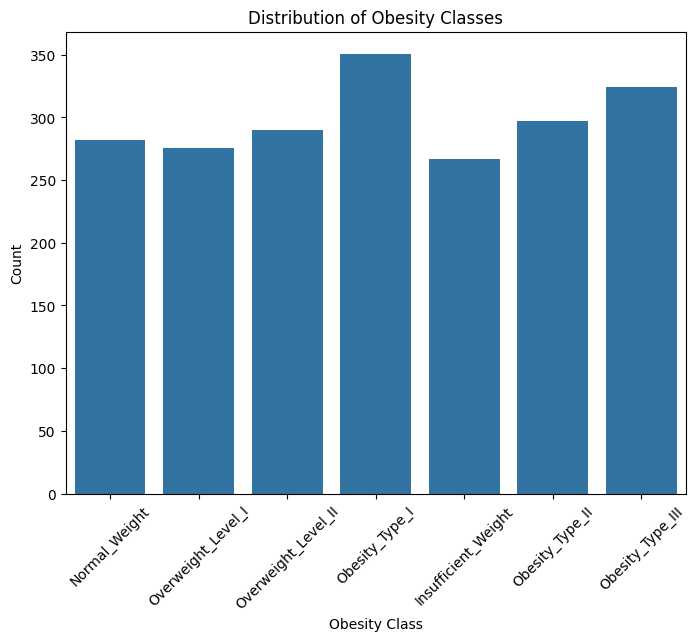

In [21]:
# Checking the distribution of the target variable
df['NObeyesdad'].value_counts()
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Classes')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [23]:
# Distribution of input and target variables
input_features = df.drop('NObeyesdad', axis=1)
target_variable = df['NObeyesdad']

In [25]:
# checking all the categorical features

categorical_columns=[feature for feature in input_features.columns if input_features[feature].dtype == 'object']
numerical_columns=[feature for feature in input_features.columns if input_features[feature].dtype != 'object']
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numerical columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [26]:
# checking the unique values in the categorical features
print("Unique values in NObeyesdad:",df['NObeyesdad'].unique())
print("Unique values in Gender:",df['Gender'].unique())
print("Unique values in family history:",df['family_history_with_overweight'].unique())
print("Unique values in FAVC:",df['FAVC'].unique())
print("Unique values in CAEC:",df['CAEC'].unique())
print("Unique values in SMOKE:",df['SMOKE'].unique())
print("Unique values in SCC:",df['SCC'].unique())
print("Unique values in CALC:",df['CALC'].unique())
print("Unique values in MTRANS:",df['MTRANS'].unique())

Unique values in NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Unique values in Gender: ['Female' 'Male']
Unique values in family history: ['yes' 'no']
Unique values in FAVC: ['no' 'yes']
Unique values in CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in SMOKE: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [27]:
# Using onehot encoding to convert categorical features into numerical features
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
encoded_features=encoder.fit_transform(df[categorical_columns])
encoded_features_df=pd.DataFrame(encoded_features.toarray(),columns=encoder.get_feature_names_out(categorical_columns))
encoded_features_df.head()

Gender_Female  Gender_Male  family_history_with_overweight_no  \
0            1.0          0.0                                0.0   
1            1.0          0.0                                0.0   
2            0.0          1.0                                0.0   
3            0.0          1.0                                1.0   
4            0.0          1.0                                1.0   

   family_history_with_overweight_yes  FAVC_no  FAVC_yes  CAEC_Always  \
0                                 1.0      1.0       0.0          0.0   
1                                 1.0      1.0       0.0          0.0   
2                                 1.0      1.0       0.0          0.0   
3                                 0.0      1.0       0.0          0.0   
4                                 0.0      1.0       0.0          0.0   

   CAEC_Frequently  CAEC_Sometimes  CAEC_no  ...  SCC_yes  CALC_Always  \
0              0.0             1.0      0.0  ...      0.0          0.0   
1              0.0             1.0      0.0  ...      1.0          0.0   
2              0.0             1.0      0.0  ...      0.0          0.0   
3              0.0             1.0      0.0  ...      0.0          0.0   
4              0.0             1.0      0.0  ...      0.0          0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0              0.0             0.0      1.0                0.0          0.0   
1              0.0             1.0      0.0                0.0          0.0   
2              1.0             0.0      0.0                0.0          0.0   
3              1.0             0.0      0.0                0.0          0.0   
4              0.0             1.0      0.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0               0.0                           1.0             0.0  
1               0.0                           1.0             0.0  
2               0.0                           1.0             0.0  
3               0.0                           0.0             1.0  
4               0.0                           1.0             0.0  

[5 rows x 23 columns]

In [29]:
training_data=encoded_features_df.join(df[numerical_columns])
training_data.head()

Gender_Female  Gender_Male  family_history_with_overweight_no  \
0            1.0          0.0                                0.0   
1            1.0          0.0                                0.0   
2            0.0          1.0                                0.0   
3            0.0          1.0                                1.0   
4            0.0          1.0                                1.0   

   family_history_with_overweight_yes  FAVC_no  FAVC_yes  CAEC_Always  \
0                                 1.0      1.0       0.0          0.0   
1                                 1.0      1.0       0.0          0.0   
2                                 1.0      1.0       0.0          0.0   
3                                 0.0      1.0       0.0          0.0   
4                                 0.0      1.0       0.0          0.0   

   CAEC_Frequently  CAEC_Sometimes  CAEC_no  ...  \
0              0.0             1.0      0.0  ...   
1              0.0             1.0      0.0  ...   
2              0.0             1.0      0.0  ...   
3              0.0             1.0      0.0  ...   
4              0.0             1.0      0.0  ...   

   MTRANS_Public_Transportation  MTRANS_Walking   Age  Height  Weight  FCVC  \
0                           1.0             0.0  21.0    1.62    64.0   2.0   
1                           1.0             0.0  21.0    1.52    56.0   3.0   
2                           1.0             0.0  23.0    1.80    77.0   2.0   
3                           0.0             1.0  27.0    1.80    87.0   3.0   
4                           1.0             0.0  22.0    1.78    89.8   2.0   

   NCP  CH2O  FAF  TUE  
0  3.0   2.0  0.0  1.0  
1  3.0   3.0  3.0  0.0  
2  3.0   2.0  2.0  1.0  
3  3.0   2.0  2.0  0.0  
4  1.0   2.0  0.0  0.0  

[5 rows x 31 columns]

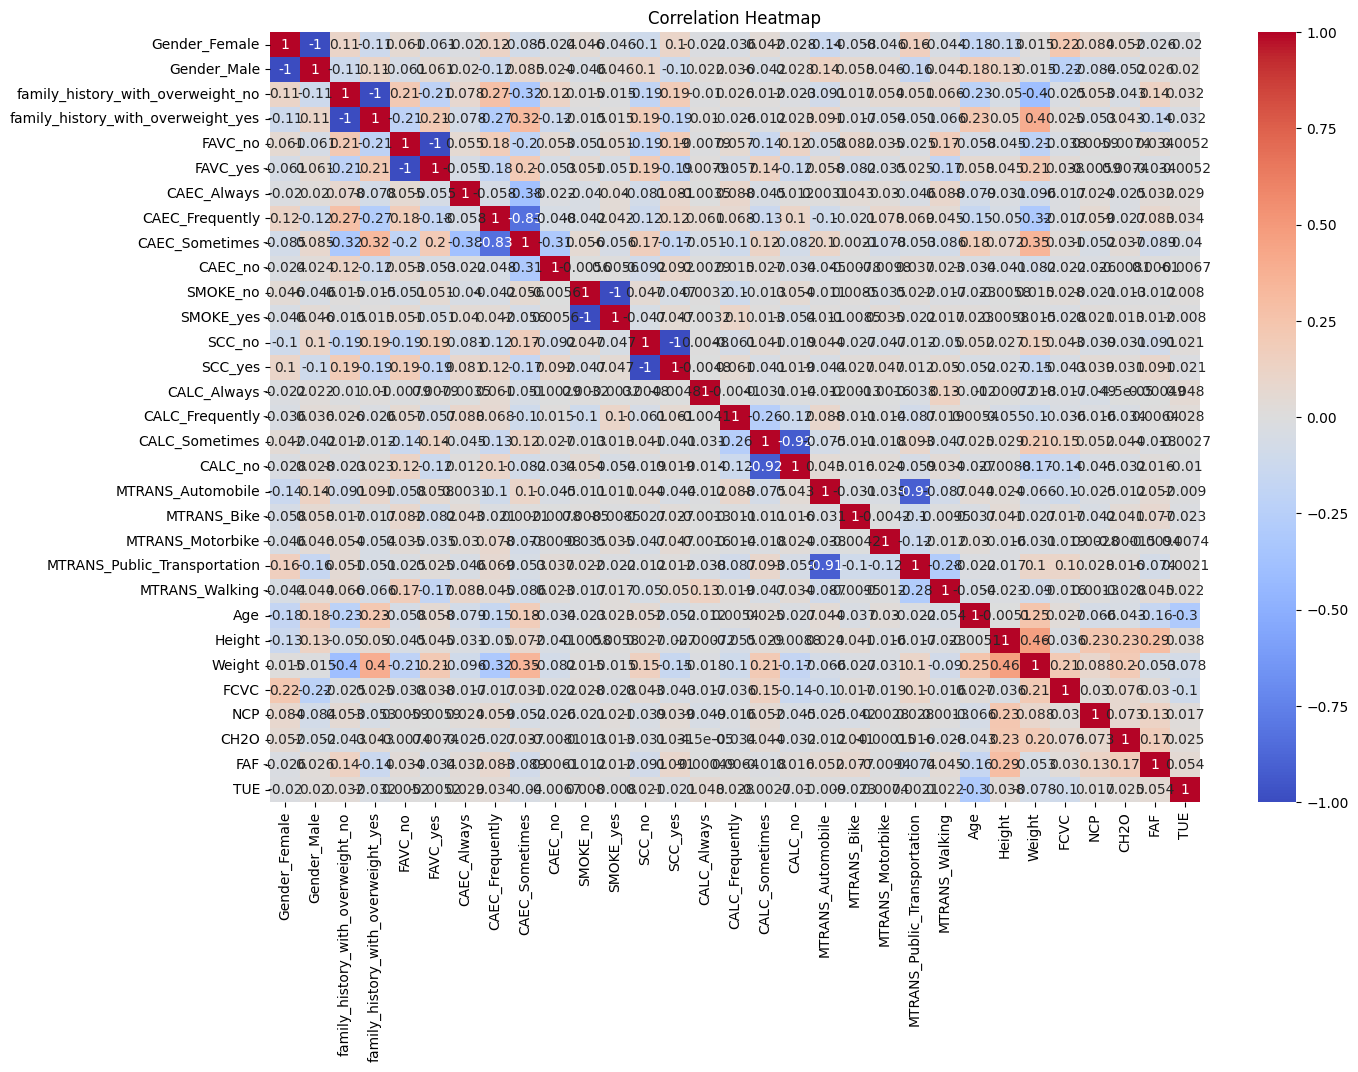

In [30]:
# Checking the correlation between the features
plt.figure(figsize=(15, 10))
sns.heatmap(training_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
training_data.corr()

Gender_Female  Gender_Male  \
Gender_Female                            1.000000    -1.000000   
Gender_Male                             -1.000000     1.000000   
family_history_with_overweight_no        0.113492    -0.113492   
family_history_with_overweight_yes      -0.113492     0.113492   
FAVC_no                                  0.061220    -0.061220   
FAVC_yes                                -0.061220     0.061220   
CAEC_Always                             -0.020006     0.020006   
CAEC_Frequently                          0.117901    -0.117901   
CAEC_Sometimes                          -0.085336     0.085336   
CAEC_no                                 -0.024323     0.024323   
SMOKE_no                                 0.045501    -0.045501   
SMOKE_yes                               -0.045501     0.045501   
SCC_no                                  -0.102435     0.102435   
SCC_yes                                  0.102435    -0.102435   
CALC_Always                             -0.021717     0.021717   
CALC_Frequently                         -0.035742     0.035742   
CALC_Sometimes                           0.041754    -0.041754   
CALC_no                                 -0.027919     0.027919   
MTRANS_Automobile                       -0.139482     0.139482   
MTRANS_Bike                             -0.057541     0.057541   
MTRANS_Motorbike                        -0.045731     0.045731   
MTRANS_Public_Transportation             0.163790    -0.163790   
MTRANS_Walking                          -0.043530     0.043530   
Age                                     -0.175533     0.175533   
Height                                  -0.132773     0.132773   
Weight                                   0.014735    -0.014735   
FCVC                                     0.221243    -0.221243   
NCP                                      0.084422    -0.084422   
CH2O                                     0.051973    -0.051973   
FAF                                     -0.026058     0.026058   
TUE                                     -0.020115     0.020115   

                                    family_history_with_overweight_no  \
Gender_Female                                                0.113492   
Gender_Male                                                 -0.113492   
family_history_with_overweight_no                            1.000000   
family_history_with_overweight_yes                          -1.000000   
FAVC_no                                                      0.214329   
FAVC_yes                                                    -0.214329   
CAEC_Always                                                  0.078017   
CAEC_Frequently                                              0.273727   
CAEC_Sometimes                                              -0.316112   
CAEC_no                                                      0.119756   
SMOKE_no                                                     0.014885   
SMOKE_yes                                                   -0.014885   
SCC_no                                                      -0.193947   
SCC_yes                                                      0.193947   
CALC_Always                                                 -0.010080   
CALC_Frequently                                              0.026325   
CALC_Sometimes                                               0.012389   
CALC_no                                                     -0.022557   
MTRANS_Automobile                                           -0.090813   
MTRANS_Bike                                                  0.016924   
MTRANS_Motorbike                                             0.053587   
MTRANS_Public_Transportation                                 0.050796   
MTRANS_Walking                                               0.065995   
Age                                                         -0.225555   
Height                                                      -0.050217   
Weight                   

<Figure size 1500x1000 with 0 Axes>

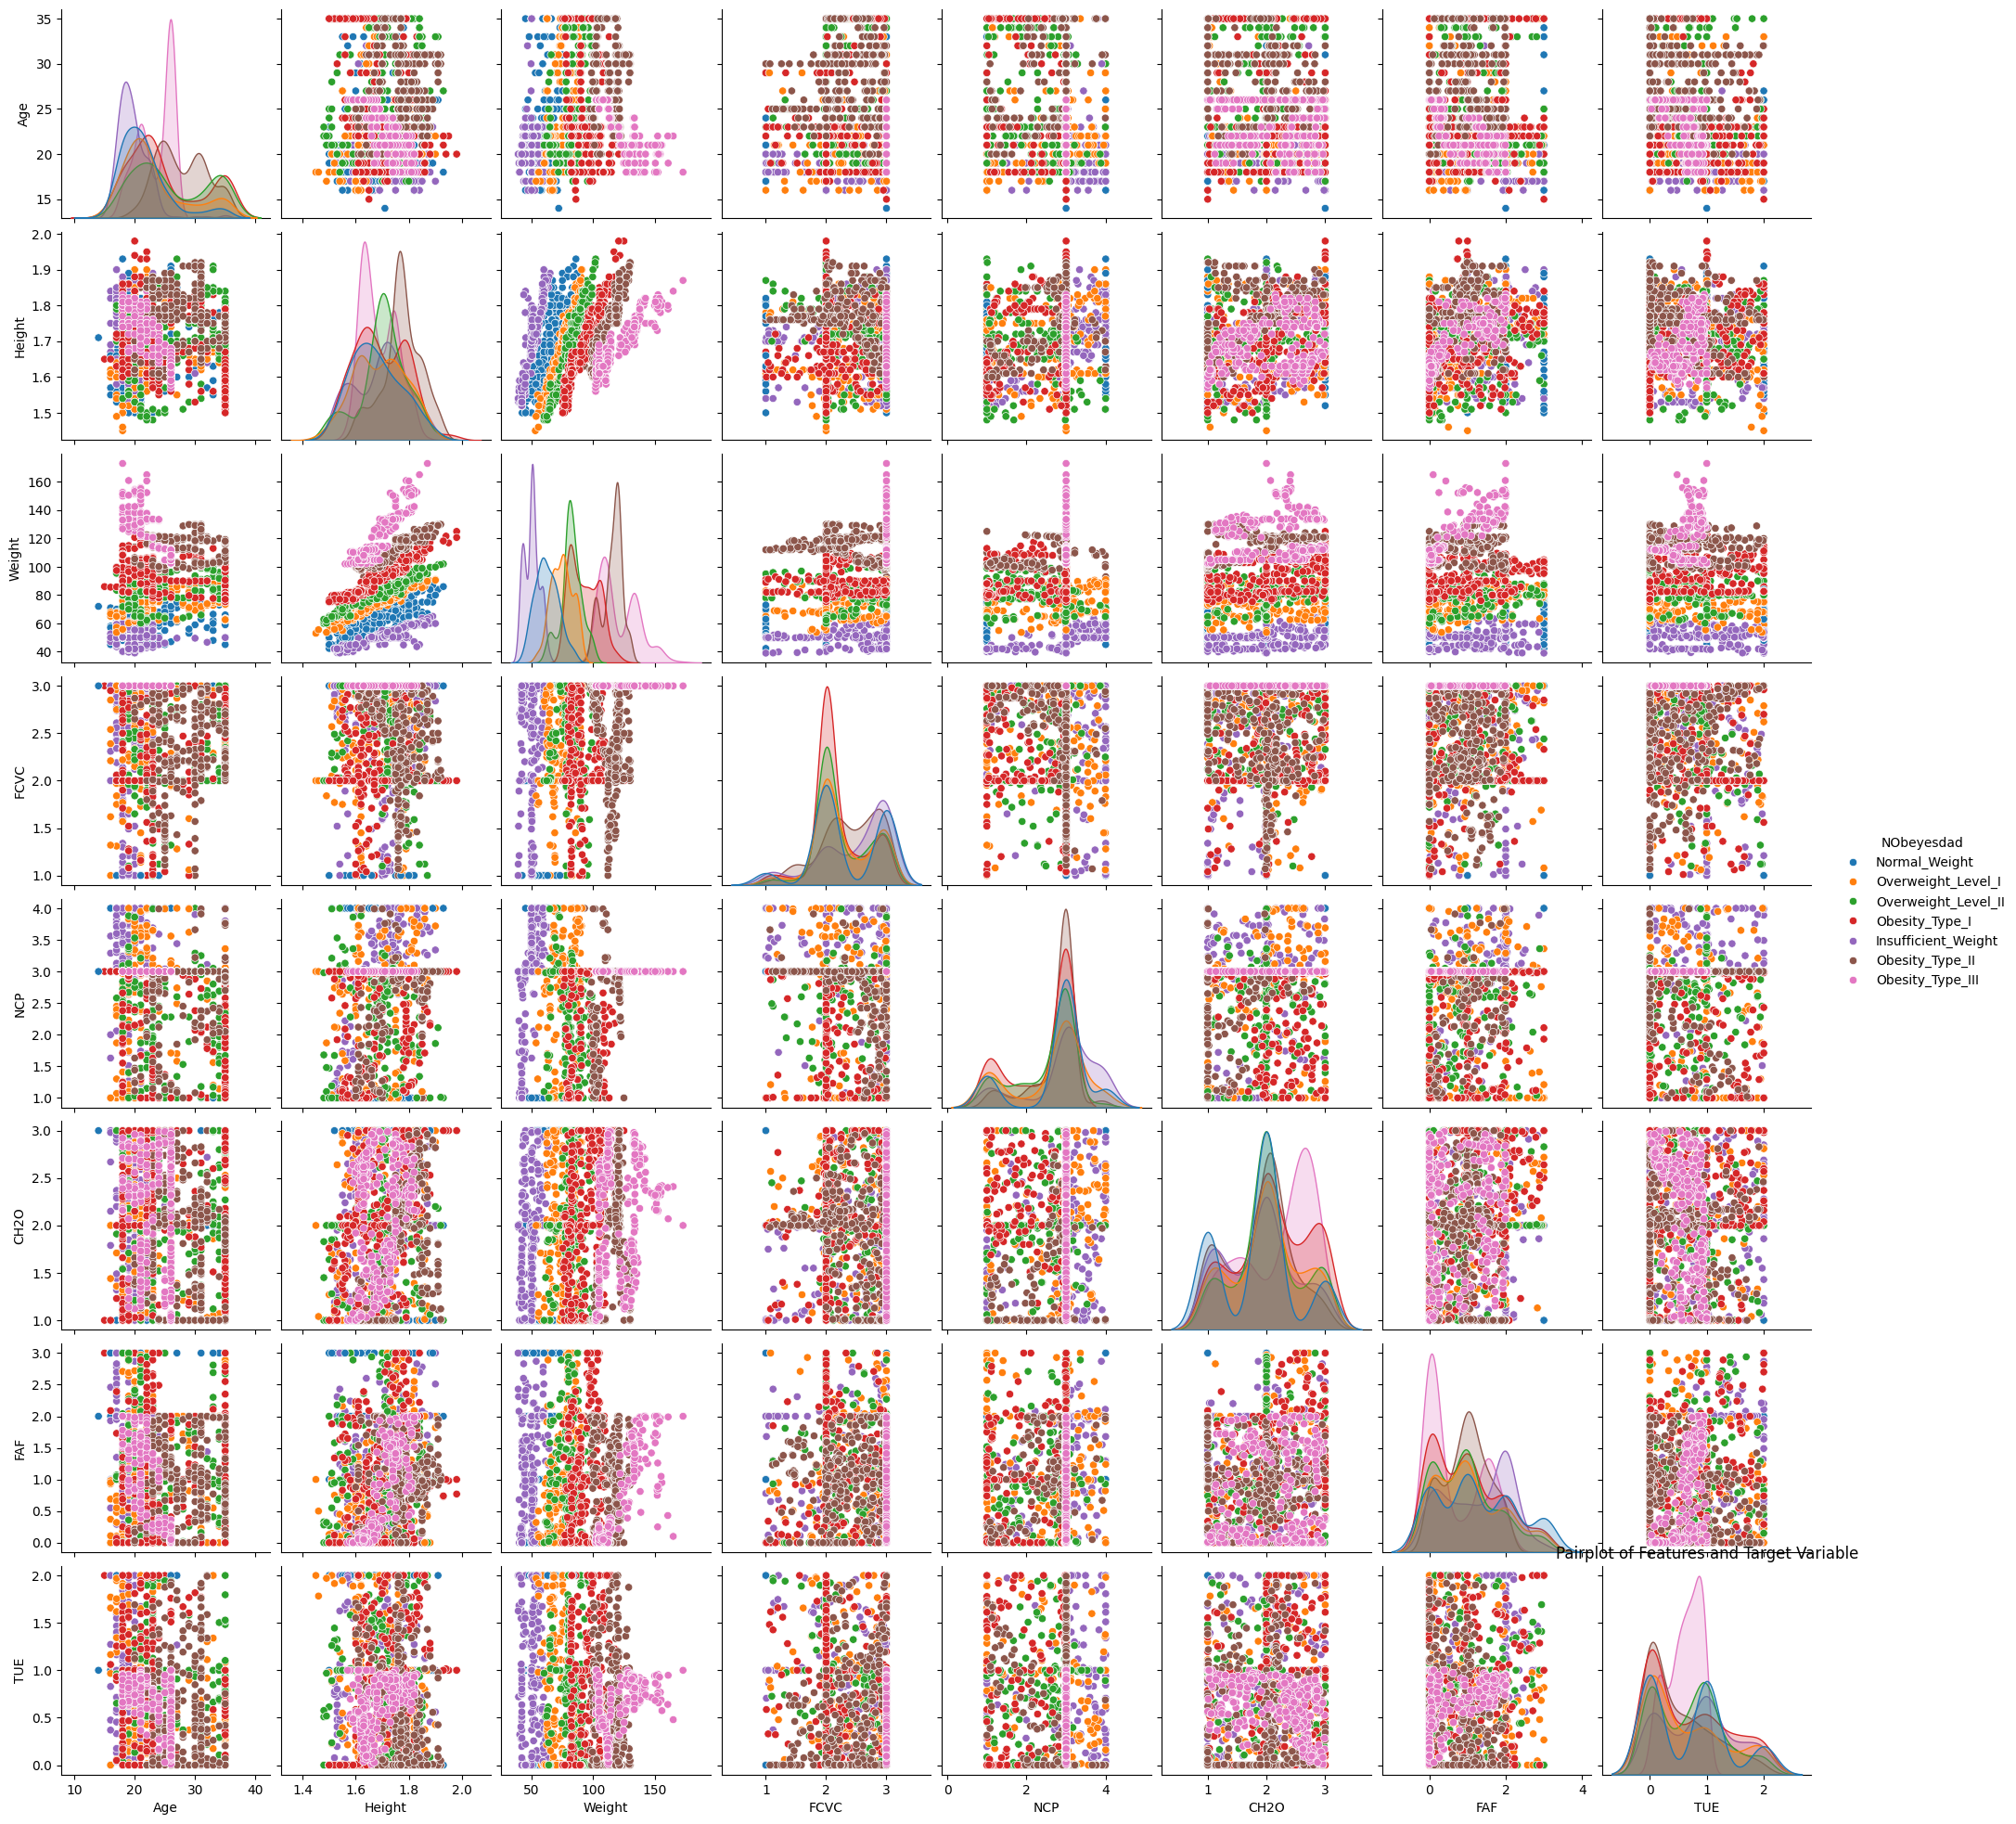

In [40]:
# let's check the scatter plot between the features and the target variable
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='NObeyesdad')
plt.title('Pairplot of Features and Target Variable')
plt.show()


In [33]:
# Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(training_data)
scaled_features_df = pd.DataFrame(scaled_features, columns=training_data.columns)
scaled_features_df.head()


Gender_Female  Gender_Male  family_history_with_overweight_no  \
0       1.008179    -1.008179                          -0.460394   
1       1.008179    -1.008179                          -0.460394   
2      -0.991887     0.991887                          -0.460394   
3      -0.991887     0.991887                           2.172052   
4      -0.991887     0.991887                           2.172052   

   family_history_with_overweight_yes   FAVC_no  FAVC_yes  CAEC_Always  \
0                            0.460394  2.754719 -2.754719    -0.161422   
1                            0.460394  2.754719 -2.754719    -0.161422   
2                            0.460394  2.754719 -2.754719    -0.161422   
3                           -2.172052  2.754719 -2.754719    -0.161422   
4                           -2.172052  2.754719 -2.754719    -0.161422   

   CAEC_Frequently  CAEC_Sometimes   CAEC_no  ...  \
0         -0.35707        0.430258 -0.134346  ...   
1         -0.35707        0.430258 -0.134346  ...   
2         -0.35707        0.430258 -0.134346  ...   
3         -0.35707        0.430258 -0.134346  ...   
4         -0.35707        0.430258 -0.134346  ...   

   MTRANS_Public_Transportation  MTRANS_Walking       Age    Height    Weight  \
0                      0.582699       -0.164520 -0.551710 -0.887932 -0.862271   
1                      0.582699       -0.164520 -0.551710 -1.957099 -1.168746   
2                      0.582699       -0.164520 -0.175515  1.036569 -0.364249   
3                     -1.716153        6.078277  0.576874  1.036569  0.018844   
4                      0.582699       -0.164520 -0.363612  0.822735  0.126111   

       FCVC       NCP      CH2O       FAF       TUE  
0 -0.776398  0.393471 -0.002061 -1.194108  0.548405  
1  1.095895  0.393471  1.639570  2.321733 -1.089609  
2 -0.776398  0.393471 -0.002061  1.149786  0.548405  
3  1.095895  0.393471 -0.002061  1.149786 -1.089609  
4 -0.776398 -2.209941 -0.002061 -1.194108 -1.089609  

[5 rows x 31 columns]

In [35]:
# Splitting the dataset into training and testing sets
X = scaled_features_df
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1460, 31) (1460,)
Testing set shape: (627, 31) (627,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [42]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7990430622009569
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.87      0.83      0.85        87
      Normal_Weight       0.63      0.68      0.66        95
     Obesity_Type_I       0.81      0.77      0.79       105
    Obesity_Type_II       0.97      0.91      0.93        95
   Obesity_Type_III       0.99      0.98      0.98        91
 Overweight_Level_I       0.70      0.69      0.69        80
Overweight_Level_II       0.64      0.72      0.68        74

           accuracy                           0.80       627
          macro avg       0.80      0.80      0.80       627
       weighted avg       0.81      0.80      0.80       627

Confusion Matrix:
 [[72  9  2  1  0  2  1]
 [ 6 65  5  0  0 11  8]
 [ 1 10 81  1  1  3  8]
 [ 0  1  5 86  0  1  2]
 [ 0  0  0  0 89  2  0]
 [ 3 10  1  0  0 55 11]
 [ 1  8  6  1  0  5 53]]


In [44]:
# let's do hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20,5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Model Accuracy: 0.8038277511961722
Best Model Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.84      0.86        87
      Normal_Weight       0.64      0.68      0.66        95
     Obesity_Type_I       0.81      0.76      0.78       105
    Obesity_Type_II       0.95      0.91      0.92        95
   Obesity_Type_III       0.99      0.98      0.98        91
 Overweight_Level_I       0.69      0.71      0.70        80
Overweight_Level_II       0.68      0.73      0.70        74

           accuracy                           0.80       627
          macro avg       0.80      0.80      0.80       627
       weighted avg       0.81      0.80      0.81       627

Best Model Confusion Matrix:
 [[73  8  2  1  0  2  1]
 [ 5 65  5  0  0 14  6]
 